# Investigating Tree Canopy Inequity In Vancouver, British Columbia
Group 50: Paul English, Zhuoran Wang, Junyao Wang, Halley Suarez, Eric Shuai

<h2 style="color:#008a05">Introduction</h2>

Urban tree cover provides a variety of ecosystem services beyond aesthetic benefits. These include a reduced heat island effect through shading, increased air quality, and reduced stormwater flooding  (McDonald et. al. 2021). Larger trees are better equipped to provide these ecosystem services as they have greater structural complexity and a more developed canopy (Baró et. al., 2019). Thus, urban tree cover is an integral piece of life in a city environment, yet there are many areas in and around Vancouver that exhibit little to no tree cover at all. 
<br>This phenomenon is known as **tree canopy inequity**, where low-income and minority neighbourhoods tend to have less tree cover and fewer large trees than wealthier and non-minority neighbourhoods. This has been observed in cities across Canada (Kiani et. al., 2023).

In this study, wealth is analyzed in the Greater Vancouver Area to see if high-income neighbourhoods correlate to having more trees as well as bigger trees. This study plans to investigate if there is a positive association between income and mean tree diameter in Vancouver to test if tree canopy inequity is present. Additionally, the standard deviation of tree diameter will be explored to quantify the observed variation in tree size.

**Question:** Does there exist a positive association between the wealthiness of a neighbourhood and the corresponding mean tree diameter in that community for the Greater Vancouver Area?

<h2 style="color:#008a05">Methods</h2>

<h3 style="color:#039be5">Experimental Design</h3>

This study will focus on the City of Vancouver Open Data `street_trees` and `AreaProfiles` dataset. The `street_trees` dataset contains information about public trees planted along boulevards in Vancouver from 2016, with key information like `DIAMETER` (in inches) and `NEIGHBOURHOOD_NAME`. We will use these to find the mean diameter in each area. `AreaProfiles` contains the average income for each neighbourhood from the 2015 census which will be used to match area incomes with its respective mean diameter to test for the tree inequity theory.

<h3 style="color:#039be5">Analysis Procedure</h3>

A preliminary analysis using descriptive statistics is conducted to contextualize the predicted results. 

The first hypothesis test uses a two-sample independent t-test procedure. First, $n_p = 50,000$ pairs of different neighbourhoods for calculating ratios are obtained. Then, from each neighbourhood in the sampled pairs, $n_d = 30$ trees will be sampled and their mean diameters will be calculated. From each pair of mean diameters, a t–score is calculated providing a t-distribution for two-tailed hypothesis testing. For the first inference it is predicted that the t-scores are distributed normally, explained by CLT.

The second hypothesis test similarly follows a two-sample independent t-test procedure,  however all tree diameters are standardized by the income. 



<h3 style="color:#039be5">Hypotheses</h3>

**Part 1:** Do tree diameters differ between neighbourhoods, and if so, by how much (standard deviation)? How certain are we (confidence interval)?

- __Null Hypothesis:__ Mean diameter derived from $n_d$ random trees in one neighbourhood $i$ is equal to the mean diameter from $n_d$ random trees in another neighbourhood $j = 1$.<br>$H_0: \mu_{d_i} = \mu_{d_j}$
- __Alternate hypothesis:__ Mean diameter derived from $n_d$ random trees in one neighbourhood $i$ is equal to the mean diameter from $n_d$ random trees in another neighbourhood $j$.<br>$H_A: \mu_{d_i} \neq  \mu_{d_j}$

Where:
- $n_d$ = Number of tree diameters to be sampled from a neighbourhood
- $i,j$ = Two different neighbourhoods
- ${mu}_{d_i},{mu}_{d_j}$ = Mean diameter obtained from $n_d$ trees grouped by neighbourhood ($i$, $j$, etc.)

**Part 2:** Infer the relationship between tree diameter and income

- __Null hypothesis:__ Mean diameter derived from $n_d$ random trees in one neighbourhood $i$ is equal to the mean standardized diameter from $n_d$ random trees in another neighbourhood $j$. <br>$H_0: \frac{\mu_{d_i}}{I_i} = \frac{\mu_{d_j}}{I_i}$ 
- __Alternate hypothesis:__ Ratios of mean tree diameter derived from a random sample of $n_d$ random trees within a neighbourhood $i$ to the income of that neighbourhood $i$. <br>$ H_A: \dfrac{\mu_{d_i}}{I_i} \neq \dfrac{\mu_{d_j}}{I_j} $ 

Where:
- $n_d$ = Number of diameters to be sampled from a neighbourhood
- ${mu}_{d_i}$ = Mean diameter from sample
- $I_i,I_j$ = Neighbourhood

<h3 style="color:#039be5">Expected Outcomes and Significance</h3>

It is expected that neighbourhoods with a higher mean income (eg. Shaughnessy) have a larger mean tree diameter than neighbourhoods with a lower mean income. It is also expected that the standard deviation of high income neighborhoods and low income neighborhoods to be similar. 

The findings of this paper help characterize the inequality of access to ecosystem services by impoverished communities in Vancouver. Conclusions drawn in this paper could aid future research to characterize how unequal access to ecosystem services contribute to an intersectional (race, gender, religion, etc.) cycle of oppression.

More precise questions tackling this topic could include:
- Do communities with smaller trees receive less infrastructure funding?
- Are properties with higher values closer to large trees and/or green space?

<h2 style="color:#008a05">Preliminary Exploratory Data Analysis</h2>

### Loading Libraries, Reading Data

In [1]:
# --- Setting up prerequisites libraries ---
library(tidyverse)
library(tidymodels)
library(repr)
library(infer)
options(repr.matrix.max.rows = 8)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [23]:
# --- Load data from the web  ---
# load data about all trees in Vancouver
street_trees <- read_delim(url("https://github.com/eshuaiii/stat-201-2023w1-group-50/raw/main/streettrees.csv"), delim=";")
# load income data in Vancouver
area_profiles <- read_csv(url("https://github.com/eshuaiii/stat-201-2023w1-group-50/raw/main/AreaProfiles.csv"), skip = 4)

# The census data contains much more information than we need, with each info point as a row.
# Hence, we'll slice only the average income field (at row 1882) from the dataset
average_income <- slice(area_profiles, 1882)

# Preview the data
head(street_trees, 3)
average_income

Rows: 150695 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (15): STD_STREET, GENUS_NAME, SPECIES_NAME, CULTIVAR_NAME, COMMON_NAME,...
dbl   (5): TREE_ID, CIVIC_NUMBER, ON_STREET_BLOCK, HEIGHT_RANGE_ID, DIAMETER
date  (1): DATE_PLANTED

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 5589 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Variable
dbl  (1): ID
num (24): Arbutus-Ridge, Downtown, Dunbar-Southlands, Fairview, Grandview-Wo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TREE_ID,CIVIC_NUMBER,STD_STREET,GENUS_NAME,SPECIES_NAME,CULTIVAR_NAME,COMMON_NAME,ASSIGNED,ROOT_BARRIER,PLANT_AREA,⋯,ON_STREET,NEIGHBOURHOOD_NAME,STREET_SIDE_NAME,HEIGHT_RANGE_ID,HEIGHT_RANGE,DIAMETER,CURB,DATE_PLANTED,Geom,geo_point_2d
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<date>,<chr>,<chr>
5791,3708,W 35TH AV,PSEUDOTSUGA,MENZIESII,NA,DOUGLAS FIR,N,N,L,⋯,W 35TH AV,DUNBAR-SOUTHLANDS,EVEN,9,90' - 100',50.00,Y,NA,"{""coordinates"": [-123.186767, 49.240027], ""type"": ""Point""}","49.240027, -123.186767"
5797,1101,E 7TH AV,ACER,PLATANOIDES,NA,NORWAY MAPLE,Y,N,N,⋯,E 7TH AV,MOUNT PLEASANT,ODD,2,20' - 30',8.25,Y,NA,"{""coordinates"": [-123.080395, 49.264375], ""type"": ""Point""}","49.264375, -123.080395"
5798,1101,E 7TH AV,ACER,PLATANOIDES,NA,NORWAY MAPLE,Y,N,N,⋯,E 7TH AV,MOUNT PLEASANT,ODD,3,30' - 40',12.25,Y,NA,"{""coordinates"": [-123.080284, 49.264372], ""type"": ""Point""}","49.264372, -123.080284"


ID,Variable,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,⋯,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey,Vancouver CSD,Vancouver CMA
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1858,Average total income in 2015 among recipients ($),62675,63251,78117,61627,42896,38258,38411,77248,⋯,53060,118668,65459,31534,34212,34298,47253,82042,50317,46821


### Sampling and creating tidy data

In [3]:
# Remove unnecessary columns and remove any data points from street_trees that have an NA value for diameter
street_trees_cleaned <- street_trees |>
    select(TREE_ID, COMMON_NAME, NEIGHBOURHOOD_NAME, DIAMETER) |>
    filter(!is.na(DIAMETER))

# Also rename all column names to be lowercase
names(street_trees_cleaned) <- tolower(names(street_trees_cleaned))

head(street_trees_cleaned)

tree_id,common_name,neighbourhood_name,diameter
<dbl>,<chr>,<chr>,<dbl>
5791,DOUGLAS FIR,DUNBAR-SOUTHLANDS,50.00
5797,NORWAY MAPLE,MOUNT PLEASANT,8.25
5798,NORWAY MAPLE,MOUNT PLEASANT,12.25
5799,NORWAY MAPLE,MOUNT PLEASANT,9.50
5800,NORWAY MAPLE,MOUNT PLEASANT,20.00
5802,NORWAY MAPLE,MOUNT PLEASANT,18.00


***Note:** Because the `street_trees` dataset contains well over 150k points, we will sample 50k points instead due to limitations of hardware. We will discuss the implications of this in our Discussion.*

In [4]:
# Setting our seed once
set.seed(50)

# taking a sample of 50k points from the trees dataset
trees <- street_trees_cleaned |>
    sample_n(50000)

Next, we'll clean up our `average_income` dataset, modifying it into a long format. We will also remove the `Variable` and `ID` columns as they give technical information, and will also remove the `Vancouver CSD` and `Vancouver CMA` columns as they are summaries of regions (`Vancouver CSD` is the average income in the entire city of Vancouver, and `Vancouver CMA` the metropolitian area of Vancouver).

In [17]:
# Lengthening the dataset and removing unnecessary columns
income <- average_income |>
    select(-Variable, -ID, -"Vancouver CSD", -"Vancouver CMA") |>
    pivot_longer(cols = everything(), names_to = "neighbourhood_name", values_to = "mean_income")
    # arrange(mean_income) # sort income in ascending order

# See the resulting data further down this report.

For consistency, we will also modify all neighbourhood names in the `trees` dataset to match those of the `average_income` dataset.

In [6]:
# Rename all locations in the `trees` dataset to match the `income` dataset
trees$neighbourhood_name[trees$neighbourhood_name == "ARBUTUS RIDGE"]<- "Arbutus-Ridge"
trees$neighbourhood_name[trees$neighbourhood_name == "DOWNTOWN"]<- "Downtown"
trees$neighbourhood_name[trees$neighbourhood_name == "DUNBAR-SOUTHLANDS"]<- "Dunbar-Southlands"
trees$neighbourhood_name[trees$neighbourhood_name == "FAIRVIEW"]<- "Fairview"
trees$neighbourhood_name[trees$neighbourhood_name == "GRANDVIEW-WOODLAND"]<- "Grandview-Woodland"
trees$neighbourhood_name[trees$neighbourhood_name == "HASTINGS-SUNRISE"]<- "Hastings-Sunrise"
trees$neighbourhood_name[trees$neighbourhood_name == "KENSINGTON-CEDAR COTTAGE"]<- "Kensington-Cedar Cottage"
trees$neighbourhood_name[trees$neighbourhood_name == "KERRISDALE"]<- "Kerrisdale"
trees$neighbourhood_name[trees$neighbourhood_name == "KILLARNEY"]<- "Killarney"
trees$neighbourhood_name[trees$neighbourhood_name == "KITSILANO"]<- "Kitsilano"
trees$neighbourhood_name[trees$neighbourhood_name == "MARPOLE"]<- "Marpole"
trees$neighbourhood_name[trees$neighbourhood_name == "MOUNT PLEASANT"]<- "Mount Pleasant"
trees$neighbourhood_name[trees$neighbourhood_name == "OAKRIDGE"]<- "Oakridge"
trees$neighbourhood_name[trees$neighbourhood_name == "RENFREW-COLLINGWOOD"]<- "Renfrew-Collingwood"
trees$neighbourhood_name[trees$neighbourhood_name == "RILEY PARK"]<- "Riley Park"
trees$neighbourhood_name[trees$neighbourhood_name == "SHAUGHNESSY"]<- "Shaughnessy"
trees$neighbourhood_name[trees$neighbourhood_name == "SOUTH CAMBIE"]<- "South Cambie"
trees$neighbourhood_name[trees$neighbourhood_name == "STRATHCONA"]<- "Strathcona"
trees$neighbourhood_name[trees$neighbourhood_name == "SUNSET"]<- "Sunset"
trees$neighbourhood_name[trees$neighbourhood_name == "VICTORIA-FRASERVIEW"]<- "Victoria-Fraserview"
trees$neighbourhood_name[trees$neighbourhood_name == "WEST END"]<- "West End"
trees$neighbourhood_name[trees$neighbourhood_name == "WEST POINT GREY"]<- "West Point Grey"

Below is a list of the region names, totalling 22:

In [7]:
income$neighbourhood_name

[1] "Arbutus-Ridge"            "Downtown"                
 [3] "Dunbar-Southlands"        "Fairview"                
 [5] "Grandview-Woodland"       "Hastings-Sunrise"        
 [7] "Kensington-Cedar Cottage" "Kerrisdale"              
 [9] "Killarney"                "Kitsilano"               
[11] "Marpole"                  "Mount Pleasant"          
[13] "Oakridge"                 "Renfrew-Collingwood"     
[15] "Riley Park"               "Shaughnessy"             
[17] "South Cambie"             "Strathcona"              
[19] "Sunset"                   "Victoria-Fraserview"     
[21] "West End"                 "West Point Grey"

###  Statistical Summary

In [15]:
# --- Summarizing `trees` ---
# summarizing per region
trees_summary_region <- trees |>
    group_by(neighbourhood_name) |>
    summarize(n = n(),
              mean_diameter = mean(diameter),
              sd_diameter = sd(diameter))
trees_summary_region

# for fun, find overall mean and sd
trees_summary_entire <- trees |>
    summarize(n = n(),
              mean_diameter = mean(diameter),
              sd_diameter = sd(diameter))

trees_summary_entire

neighbourhood_name,n,mean_diameter,sd_diameter
<chr>,<int>,<dbl>,<dbl>
Arbutus-Ridge,1768,12.007489,8.755964
Downtown,1666,8.109934,5.838565
Dunbar-Southlands,3199,14.619772,10.775832
Fairview,1401,11.629122,8.419905
⋮,⋮,⋮,⋮
Sunset,2793,10.72436,8.430826
Victoria-Fraserview,2669,10.26883,8.283765
West End,1126,12.36965,8.132773
West Point Grey,1579,13.83002,10.062693


n,mean_diameter,sd_diameter
<int>,<dbl>,<dbl>
50000,11.91723,9.297665


In [18]:
# --- Summarizing `income` ---

# producing the average income in all regions, again, bypassing max rows
income

# just for fun, find average income
income_average <- income |>
    summarize(average = mean(mean_income)) |>
    pull()
paste("Average income across all Vancouver regions is", income_average)

neighbourhood_name,mean_income
<chr>,<dbl>
Arbutus-Ridge,62675
Downtown,63251
Dunbar-Southlands,78117
Fairview,61627
⋮,⋮
Sunset,34212
Victoria-Fraserview,34298
West End,47253
West Point Grey,82042


[1] "Average income across all Vancouver regions is 54739.5"

### General Visualizations

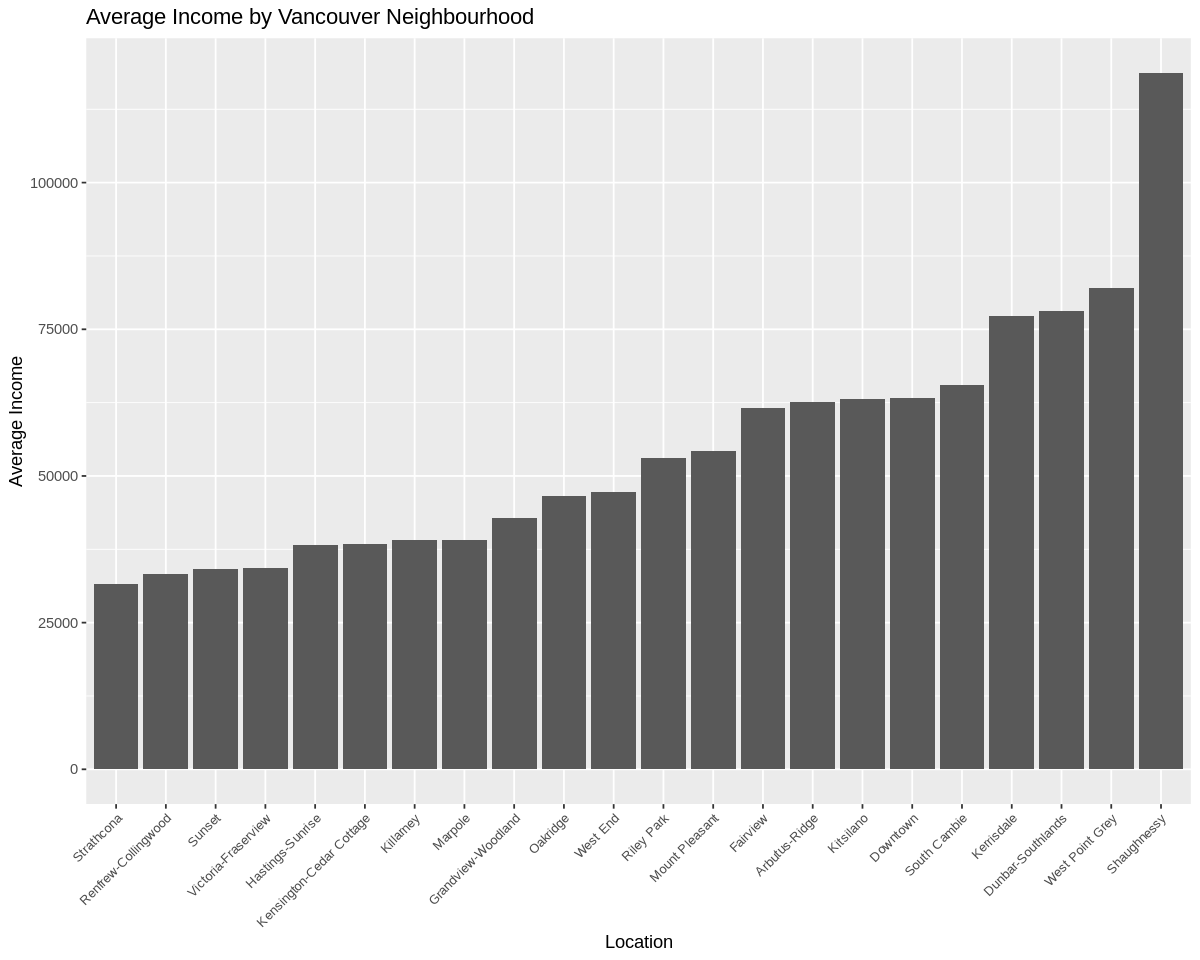

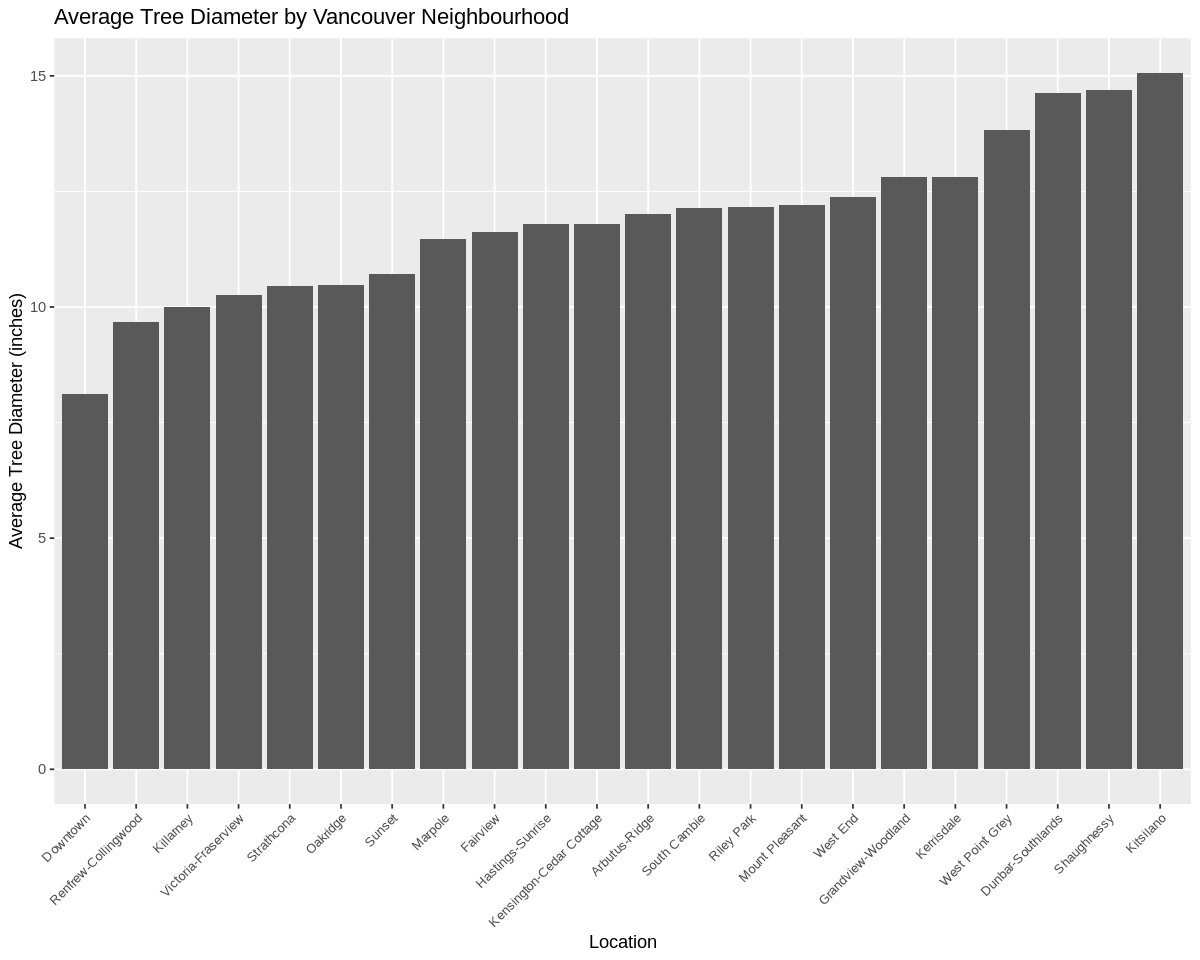

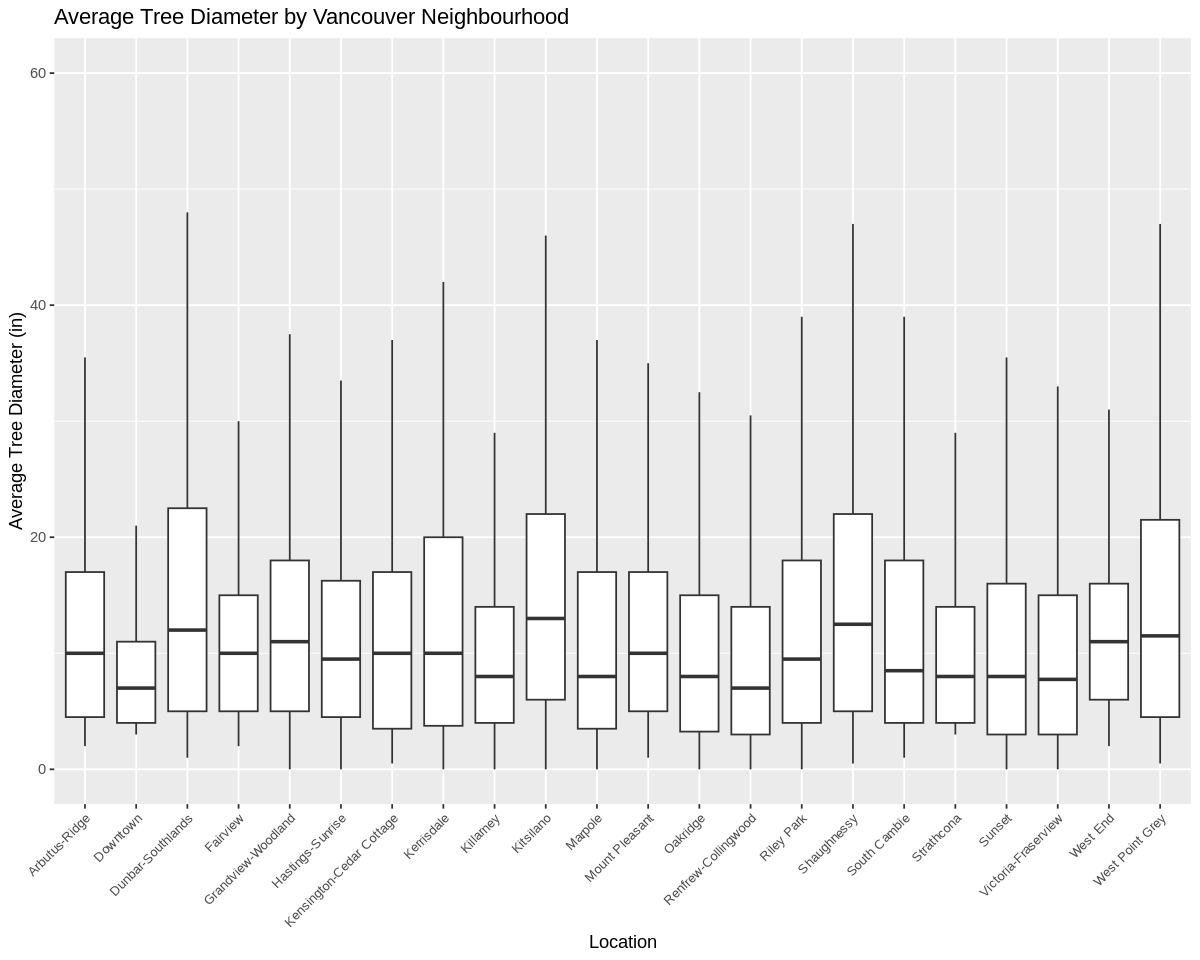

In [13]:
options(repr.plot.width = 10, repr.plot.height = 8)

# Visualize the average income of each neighbourhood
income_plot <- income |>
    ggplot(aes(x = reorder(neighbourhood_name, +mean_income), y = mean_income)) +
    geom_bar(stat = "identity") +
    labs(title="Average Income by Vancouver Neighbourhood",
         x="Location",
         y="Average Income") +
    theme(axis.text.x = element_text(size=8, angle=45, hjust=1))
income_plot

# Visualize the mean of average tree diameter for each neighbourhood
tree_plot_average <- trees_summary_region |>
    ggplot(aes(x = reorder(neighbourhood_name, +mean_diameter), y = mean_diameter)) +
    geom_bar(stat = "identity") +
    labs(title="Average Tree Diameter by Vancouver Neighbourhood",
         x="Location",
         y="Average Tree Diameter (inches)") +
    theme(axis.text.x = element_text(size=8, angle=45, hjust=1))
tree_plot_average

# Visualize the mean and spread of average tree diameter for each neighbourhood using a boxplot# Note we are removing the outliers for initial comparison purposes.
tree_boxplot <- trees |>
    ggplot(aes(x = neighbourhood_name, y = diameter)) +
    geom_boxplot(outlier.shape = NA) +
    labs(title="Average Tree Diameter by Vancouver Neighbourhood",
         x="Location",
         y="Average Tree Diameter (in)") +
    theme(axis.text.x = element_text(size=8, angle=45, hjust=1)) +
    coord_cartesian(ylim = c(0, 60))

tree_boxplot

<h2 style="color:#008a05">References</h2>

Baró, F., Calderón-Argelich, A., Langemeyer, J., & Connolly, J. J. (2019). Under one canopy? Assessing the distributional environmental justice implications of street tree benefits in Barcelona. Environmental Science & Policy, 102, 54-64. https://www.sciencedirect.com/science/article/pii/S0169204620314766

Kiani, B., Thierry, B., Fuller, D., Firth, C., Winters, M., & Kestens, Y. (2023). Gentrification, neighborhood socioeconomic factors and urban vegetation inequities: A study of greenspace and tree canopy increases in Montreal, Canada. Landscape and Urban Planning, 240, 104871. https://doi.org/10.1016/j.landurbplan.2023.104871

McDonald, R. I., Biswas, T., Sachar, C., Housman, I., Boucher, T. M., Balk, D., Nowak, D., Spotswood, E., Stanley, C. K., & Leyk, S. (2021). The tree cover and temperature disparity in US urbanized areas: Quantifying the association with income across 5,723 communities. PLOS ONE, 16(4), e0249715. https://doi.org/10.1371/journal.pone.0249715

<br><br><br>
*Thank you! - Group 50*